# Python 3학년 머신러닝의 구조
- Chapter 3 -> Lesson 6

### Lesson 6 데이터를 준비한다

In [2]:
from sklearn.datasets import make_blobs
# 랜덤 시드 0, 특징량 2, 클러스터 2, 표준편차 1인 300개의 데이터 세트
X, y = make_blobs(
    random_state = 0, # 랜덤 시드 0
    n_features = 2, # 특징량 2
    centers = 2, # 클러스터 2
    cluster_std = 1, # 표준편차 1
    n_samples = 300 # 점 300개
)

In [4]:
import pandas as pd

# 특징량(X)으로 데이터 프레임을 만들고, 분류(y)를 target 열로 추가
df = pd.DataFrame(X)
df["target"] = y
df.head()

,0,1,target
0,3.359415,5.248267,0
1,2.931100,0.782556,1
2,1.120314,5.758061,0
3,2.876853,0.902956,1
4,1.666088,5.605634,0


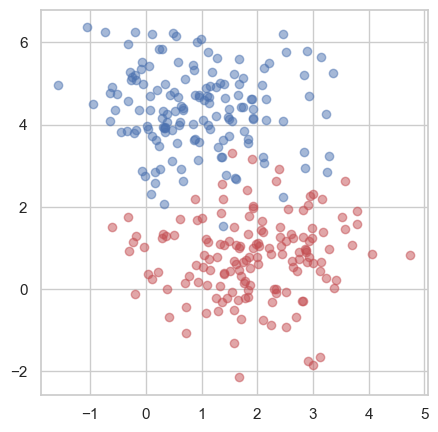

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# 분류에 따라 각각 다른 데이터 프레임으로 나눈다.
df0 = df[df["target"] == 0]
df1 = df[df["target"] == 1]
# 분류0은 파란색, 분류1은 빨간색으로 산포도를 그린다.
plt.figure(figsize = (5,5))
plt.scatter(df0[0], df0[1], color = "b", alpha = 0.5) # 파란색 산포도 작성
plt.scatter(df1[0], df1[1], color = "r", alpha = 0.5) # 빨간색 산포도 작성
plt.show()

### Lesson 7 데이터를 학습용과 테스트용으로 나눈다

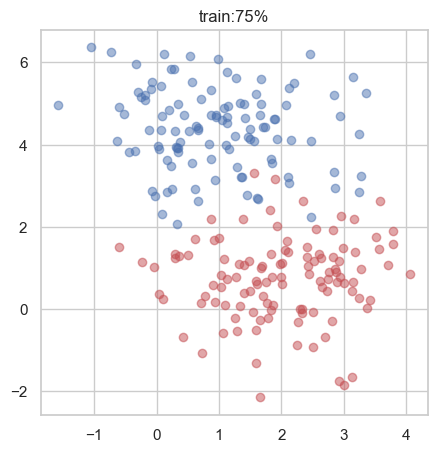

In [9]:
# 학습용 데이터와 테스트용 데이터로 나눈다. (75%:25% -> 자동 분할)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 학습용의 특징량(X_train)으로 데이터 프레임을 만들고, 분류(y_train)을 target 열로 추가
df = pd.DataFrame(X_train) # 학습용 데이터 프레임 작성
df["target"] = y_train
# 분류에 따라 각각 다른 데이터 프레임으로 나눈다.
df0 = df[df["target"] == 0]
df1 = df[df["target"] == 1]
# 분류0은 파란색, 분류1은 빨간색으로 산포도를 그린다.
plt.figure(figsize = (5,5))
plt.scatter(df0[0], df0[1], color = "b", alpha = 0.5) # 파란색 산포도 작성
plt.scatter(df1[0], df1[1], color = "r", alpha = 0.5) # 빨간색 산포도 작성
plt.title("train:75%")
plt.show()

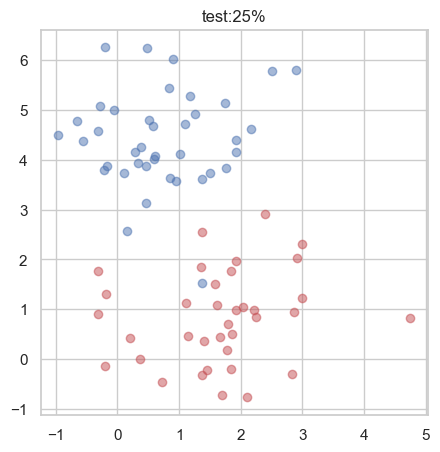

In [10]:
# 테스트용의 특징량(X_test)으로 데이터 프레임을 만들고, 분류(y_test)을 target 열로 추가
df = pd.DataFrame(X_test) # 테스트용 데이터 프레임 작성
df["target"] = y_test
# 분류에 따라 각각 다른 데이터 프레임으로 나눈다.
df0 = df[df["target"] == 0]
df1 = df[df["target"] == 1]
# 분류0은 파란색, 분류1은 빨간색으로 산포도를 그린다.
plt.figure(figsize = (5,5))
plt.scatter(df0[0], df0[1], color = "b", alpha = 0.5) # 파란색 산포도 작성
plt.scatter(df1[0], df1[1], color = "r", alpha = 0.5) # 빨간색 산포도 작성
plt.title("test:25%")
plt.show()

### Lesson 8 모델을 선택해서 학습한다

In [11]:
from sklearn import svm
# 서포터 벡터 머신으로 학습 모델을 만든다.
model = svm.SVC()
# 학습용 데이터를 넘겨주고 학습한다.
model.fit(X_train, y_train)

SVC()

### Lesson 9 모델을 테스트한다

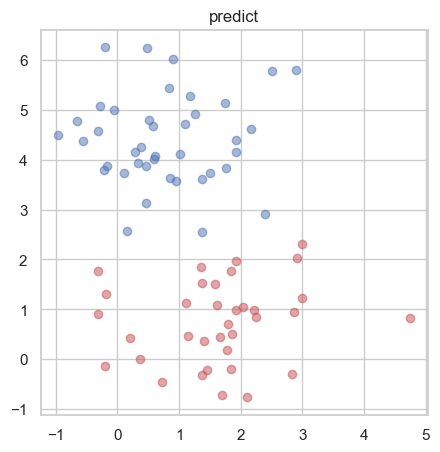

In [12]:
# 테스트용 데이터 전체로 예측한다.
pred = model.predict(X_test)
# 테스트용 특징량(X_test)으로 데이터 프레임을 만들고, 예측 결과(pred)를 target 열로서 추가
df = pd.DataFrame(X_test)
df["target"] = pred
# 분류에 따라 각각 다른 데이터 프레임으로 나눈다.
df0 = df[df["target"] == 0]
df1 = df[df["target"] == 1]
# 분류0은 파란색, 분류1은 빨간색으로 산포도를 그린다.
plt.figure(figsize = (5,5))
plt.scatter(df0[0], df0[1], color = "b", alpha = 0.5) # 파란색 산포도 작성
plt.scatter(df1[0], df1[1], color = "r", alpha = 0.5) # 빨간색 산포도 작성
plt.title("predict")
plt.show()

In [13]:
from sklearn.metrics import accuracy_score

# 정답률을 조사한다(테스트 데이터로).
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("정답률: ", score*100, "%")

정답률:  96.0 %


### Lesson 10 새로운 값을 넘겨주고 예측한다

In [14]:
# 설명 변수(특징량)가 '1과 3'인 결과를 예측
pred = model.predict([[1, 3]])
print("1, 3 =", pred)

# 설명 변수(특징량)가 '1과 2'인 결과를 예측
pred = model.predict([[1, 2]])
print("1, 2 =", pred)

1, 3 = [0]
1, 2 = [1]


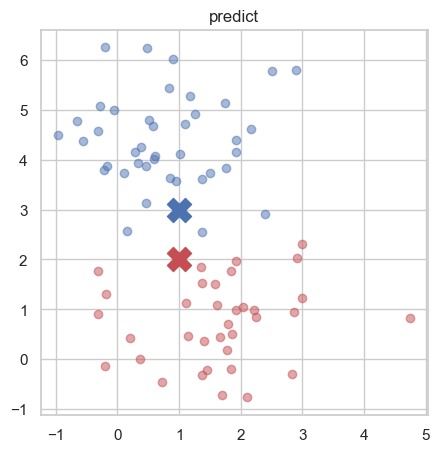

In [17]:
# 산포도 상에 [1, 3], [1, 2] 위치에 X를 그린다.
plt.figure(figsize = (5,5))
plt.scatter(df0[0], df0[1], color = "b", alpha= 0.5) # 파란색 산포도 작성
plt.scatter(df1[0], df1[1], color = "r", alpha= 0.5) # 빨간색 산포도 작성
plt.scatter([1], [3], color = "b", marker = "X", s = 300) # 파란색 마커 표시
plt.scatter([1], [2], color = "r", marker = "X", s = 300) # 빨간색 마커 표시
plt.title("predict")
plt.show()

### Lesson 11 분류 상태를 시각화한다

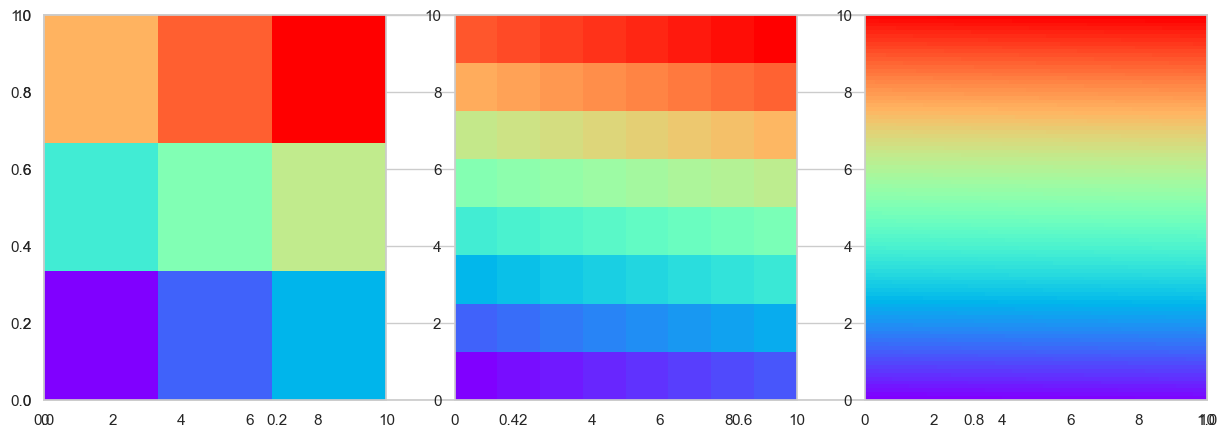

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplots(figsize = (15,5))

# pcolormesh를 사용하면 표시 범위를 분할해서 색칠할 수 있다.
# 3x3, 8x8, 100x100으로 조밀할수록 매끄럽게 칠해진다.
sizelist = [3, 8, 100] # 세 가지 크기 리스트
for i in range(3):
    size = sizelist[i]
    X, Y = np.meshgrid(np.linspace(0, 10, size+1), # 점 데이터 작성
                       np.linspace(0, 10, size+1))
    C = np.linspace(0, 100, size*size).reshape(size, size)
    plt.subplot(1, 3, i+1)
    plt.pcolormesh(X, Y, C, cmap = "rainbow") # 무지개색으로 칠한다.

plt.show()

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 산포도에 분류 상태를 그리는 함수
def plot_boundary(model, X, Y, target, xlabel, ylabel):
    # 점과 색칠 컬러맵
    cmap_dots = ListedColormap(["#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap(["#c6dcec", "#ffdec2", "#cae7ca"])
    
    plt.figure(figsize = (5,5))
    # 모델이 있으면 표시 범위의 점을 모두 예측해서 색을 칠한다.
    if model:
        # 표시 범위를 조금 넓혀 분할하고, 조사하는 점(200x200)을 준비한다.
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        # 모든 점의 값을 모델로 예측한다.
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        # 예측 결과 값(0 ~ 2)의 색(cmap_dots)으로 칠한다.
        plt.pcolormesh(XX, YY, pred, cmap = cmap_fills, shading = "auto")
        # 경계를 회색으로 칠한다.
        plt.contour(XX, YY, pred, colors = "gray")
    # target 값(0~2)의 색(cmap_dots)으로 점을 그린다.
    plt.scatter(X, Y, c = target, cmap = cmap_dots)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

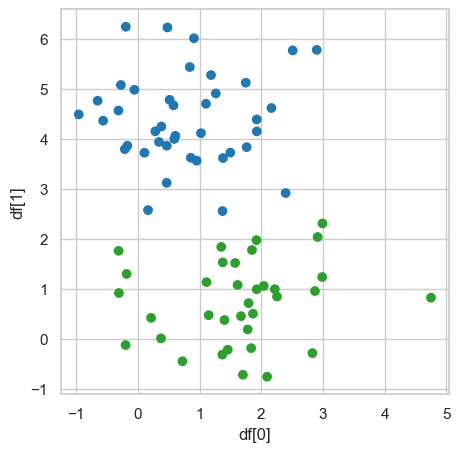

In [33]:
# 테스트용 특징량(X_test)으로 데이터 프레임을 만든다.
df = pd.DataFrame(X_test)

# 테스트용 특징량(X_test)을 넘겨주고 예측 데이터를 만든다.
pred = model.predict(X_test)

# 산포도만 그린다.
plot_boundary(None, df[0], df[1], pred, "df[0]", "df[1]")

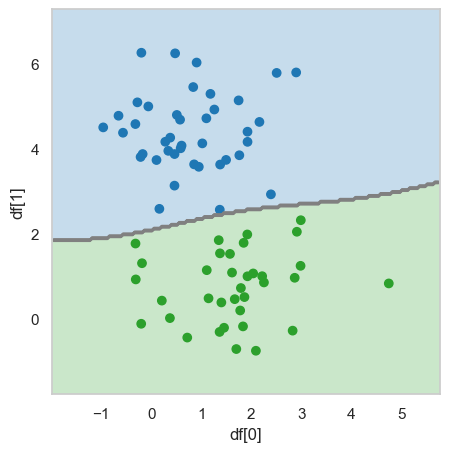

In [34]:
# 분류 상태를 그린다.
plot_boundary(model, df[0], df[1], pred, "df[0]", "df[1]")